In [72]:
%load_ext autoreload
%autoreload 2
from funcs import readin, show_adj_matrix, obj_function, adjmatrix2adjmap, GreedySPlex
import numpy as np
import networkx as nx
from itertools import chain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
def is_splex( A: np.ndarray,  s: int) -> bool:
    G = nx.from_numpy_array(A)

    for cc in nx.connected_components(G):
        if not is_splex_component(cc, s, A):
            return False
        
    return True


def is_splex_component(component : set, s: int, A: np.ndarray = A):
    component = list(component)
    neighbor_degrees = A[component].sum(axis=1)
    return (neighbor_degrees >= neighbor_degrees.shape[0] - s).sum() > 0 
    

In [123]:
S, A, W = readin('data/test1.txt')
N = A.shape[0]
A1 = np.zeros(A.shape)


True


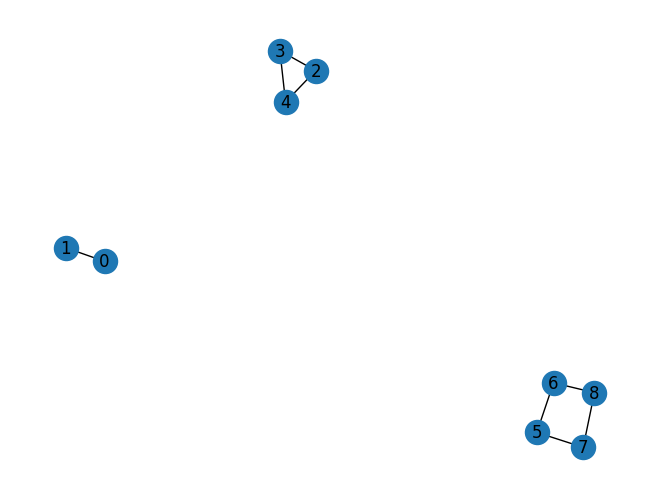

In [128]:
solver = GreedySPlex(A,W,2)
A1, splexes = solver.random_solution()
# splexes
print(is_splex(A1,2))
show_adj_matrix(A1)
# obj_function(A,A1,W)

### Implentetion of a basic local search with first improvement

In [129]:
cluster = list(splexes[0])
a = cluster[0]
c = cluster[1]
vicini_a = np.where(A[a])[0]
vicini_c = np.where(A[c])[0]

for el in vicini_a:
    if el != c:
        b = el
        break
for el in vicini_c:
    if el != a and el != b:
        d = el
        break

costo = W[a,d] + W[c,b] - W[a,b] - W[c,d]
print(a, c)
print(vicini_a, vicini_c)
# print('Removed edges: ', (a,b), (c,d))
# print('Added edges: ', (a,d), (b,c))
# print(W[a,d], W[c,b], W[a,b], W[c,d])
# print(costo)

0 1
[1 3] [0 2]
